In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from math import trunc

In [2]:
clinical_test_data = pd.read_csv('clinicaltrial_data.csv')
mouse_test_data = pd.read_csv('mouse_drug_data.csv') 
clinical_test_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
Mouse ID              1893 non-null object
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 59.2+ KB


In [3]:
mouse_test_data.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
Mouse ID    250 non-null object
Drug        250 non-null object
dtypes: object(2)
memory usage: 4.0+ KB


In [4]:
merged_ordered = pd.merge(clinical_test_data, mouse_test_data,on ="Mouse ID",how='outer')
merged_ordered





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


In [5]:
Tumor_response =  merged_ordered.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']
Tumor_response.head()

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
Name: Tumor Volume (mm3), dtype: float64

In [39]:
Tumor_response = pd.pivot_table(merged_ordered, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', aggfunc = np.mean)
Tumor_response


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


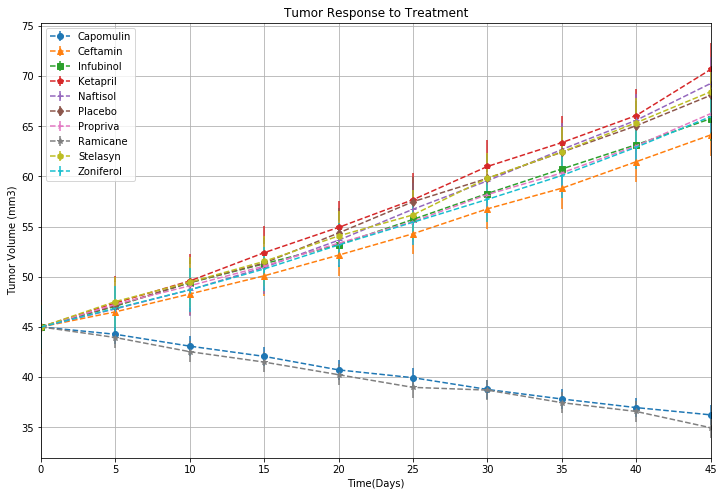

In [61]:
# lets generate tumor volume for the purose of generating tumor response treatment vs time(days)

Timepoint = Tumor_response.index
# formating= errbar then timepoint,then tumorresp(drugname) then yerr=tumorresp,then marker then linestyle and finally label(drugname)
plt.figure(figsize=(10,8))
plt.errorbar(Timepoint, Tumor_response['Capomulin'],yerr=Tumor_response['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")
plt.errorbar(Timepoint, Tumor_response['Ceftamin'],yerr=Tumor_response['Ceftamin'].sem(), marker ='^', linestyle='--', label="Ceftamin")
plt.errorbar(Timepoint, Tumor_response['Infubinol'],yerr=Tumor_response['Infubinol'].sem(), marker ='s', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, Tumor_response['Ketapril'],yerr=Tumor_response['Ketapril'].sem(), marker ='p', linestyle='--', label="Ketapril")
plt.errorbar(Timepoint, Tumor_response['Naftisol'],yerr=Tumor_response['Naftisol'].sem(), marker ='+', linestyle='--', label="Naftisol")
plt.errorbar(Timepoint, Tumor_response['Placebo'],yerr=Tumor_response['Placebo'].sem(), marker ='d', linestyle='--', label="Placebo")
plt.errorbar(Timepoint, Tumor_response['Propriva'],yerr=Tumor_response['Propriva'].sem(), marker ='4', linestyle='--', label="Propriva")
plt.errorbar(Timepoint, Tumor_response['Ramicane'],yerr=Tumor_response['Ramicane'].sem(), marker ='*', linestyle='--', label="Ramicane")
plt.errorbar(Timepoint, Tumor_response['Stelasyn'],yerr=Tumor_response['Stelasyn'].sem(), marker ='h', linestyle='--', label="Stelasyn")
plt.errorbar(Timepoint, Tumor_response['Zoniferol'],yerr=Tumor_response['Zoniferol'].sem(), marker ='1', linestyle='--', label="Zoniferol")
plt.gca().set(xlabel = 'Time(Days)', ylabel = 'Tumor Volume (mm3)',title = 'Tumor Response to Treatment',xlim = (0,max(Timepoint)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()

In [77]:
# metastatic response to treatment 
Metastatic_df = pd.pivot_table(Timepoint_response, index='Timepoint', columns='Drug', values='Metastatic Sites', aggfunc = np.mean)
Metastatic_df



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


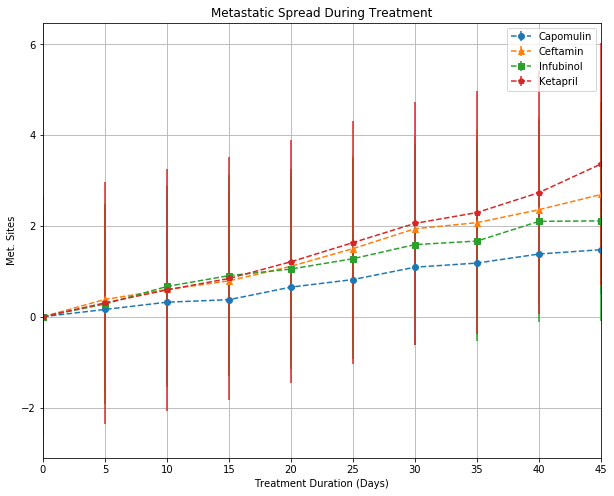

In [95]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# focused on the metastatic spread
# define metastatic
Metastatic = Metastatic_df.index
plt.figure(figsize=(10,8))

plt.errorbar(Timepoint, Metastatic_df['Capomulin'],yerr=Tumor_response['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")
plt.errorbar(Timepoint, Metastatic_df['Ceftamin'],yerr=Tumor_response['Ceftamin'].sem(), marker ='^', linestyle='--', label="Ceftamin")
plt.errorbar(Timepoint, Metastatic_df['Infubinol'],yerr=Tumor_response['Infubinol'].sem(), marker ='s', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, Metastatic_df['Ketapril'],yerr=Tumor_response['Ketapril'].sem(), marker ='p', linestyle='--', label="Ketapril")

# 
# resources https://www.youtube.com/watch?v=HweGmDcxu3I


plt.gca().set(xlabel = 'Treatment Duration (Days)', ylabel = 'Met. Sites',title = 'Metastatic Spread During Treatment',xlim = (0,max(Metastatic)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()


In [119]:
# Survival Rates 

mouse_response =  merged_ordered.groupby(['Drug','Timepoint']).count()[['Mouse ID']]
mouse_df.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [120]:
survival_pivot = pd.pivot_table(mouse_survival, index='Timepoint', columns='Drug', values='Mouse ID', aggfunc = np.mean)
survival_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [121]:
Survival_percentage = Survival_pivot.copy()
Survival_percentage = round(Survival_percentage.apply(lambda c: c / c.max() * 100, axis=0),2)
Survival_percentage

survival = percent_survived.index
plt.figure(figsize=(10,8))
plt.errorbar(Timepoint, percent_survived['Capomulin'],yerr=Tumor_response['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")
plt.errorbar(Timepoint, percent_survived['Ceftamin'],yerr=Tumor_response['Ceftamin'].sem(), marker ='^', linestyle='--', label="Ceftamin")
plt.errorbar(Timepoint, percent_survived['Infubinol'],yerr=Tumor_response['Infubinol'].sem(), marker ='s', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, percent_survived['Ketapril'],yerr=Tumor_response['Ketapril'].sem(), marker ='p', linestyle='--', label="Ketapril")

plt.gca().set(xlabel = 'Time (Days)', ylabel = 'Survival Rate(%)',title = 'Survival During Treatment',xlim = (0,max(Survival_rate)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()


NameError: name 'Survival_pivot' is not defined